In [1]:
%matplotlib inline
#*******************************************************************************
# Dependencies and Setup
#*******************************************************************************
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#*******************************************************************************
# Load Data Files
#*******************************************************************************
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

#*******************************************************************************
# Read the City and Ride Data from the files
#*******************************************************************************
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

#*******************************************************************************
# Combine the data into a single dataset
#*******************************************************************************
merge_table = pd.merge(ride_data_df, city_data_df, on="city")

#*******************************************************************************
# Display the data table for preview
#*******************************************************************************
merge_table.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [3]:
#*******************************************************************************
# Obtain the x and y coordinates for each of the three city types
# City Types: Urban, Suburban and Rural
# x Axis: Number of Rides (per City)
# y Axis: Average Fare ($)
# z = Circle size which correlates with driver count per city
#*******************************************************************************


In [4]:
#*******************************************************************************
# Urban Data
#*******************************************************************************
# Pull Urban data out of the merged file
urban_df = merge_table.loc[merge_table["type"] == "Urban", :]
# Urban Data - Number of Rides by City
urban_ride_count = urban_df.groupby(["city"]).count()["ride_id"]
# Urban Data - Average Fare by City
urban_ave_fare = urban_df.groupby(["city"]).mean()["fare"]
# Urban Data - Driver Count by City
urban_driver_count = urban_df.groupby(["city"]).mean()["driver_count"]


In [5]:
#*******************************************************************************
# Suburban Data
#*******************************************************************************
# Pull Suburban data out of the merged file
suburban_df = merge_table.loc[merge_table["type"] == "Suburban", :]
# Suburban Data - Number of Rides by City
suburban_ride_count = suburban_df.groupby(["city"]).count()["ride_id"]
# Suburban Data - Average Fare by City
suburban_ave_fare = suburban_df.groupby(["city"]).mean()["fare"]
# Suburban Data - Driver Count by City
suburban_driver_count = suburban_df.groupby(["city"]).mean()["driver_count"]


In [6]:
#*******************************************************************************
# Rural Data
#*******************************************************************************
# Pull Rural data out of the merged file
rural_df = merge_table.loc[merge_table["type"] == "Rural", :]
# Rural Data - Number of Rides by City
rural_ride_count = rural_df.groupby(["city"]).count()["ride_id"]
# Rural Data - Average Fare by City
rural_ave_fare = rural_df.groupby(["city"]).mean()["fare"]
# Rural Data - Driver Count by City
rural_driver_count = rural_df.groupby(["city"]).mean()["driver_count"]


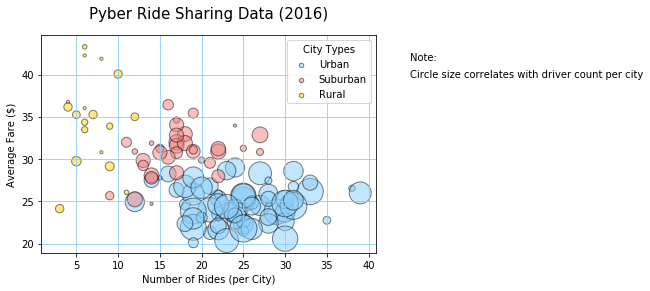

In [7]:
#*******************************************************************************
# Use above data to produce a bubble chart 
# use the scatter function
#*******************************************************************************

#*******************************************************************************
# Scatter Plot for Urban City Type
#*******************************************************************************
plt.scatter(urban_ride_count, urban_ave_fare, s=10*urban_driver_count, 
            alpha=0.5, facecolors="lightskyblue", edgecolors="black", label="Urban")
#*******************************************************************************
# Scatter Plot for Suburban City Type
#*******************************************************************************
plt.scatter(suburban_ride_count, suburban_ave_fare, s=10*suburban_driver_count,
            alpha=0.5, facecolors="lightcoral", edgecolors="black", label="Suburban")
#*******************************************************************************
# Scatter Plot for Rural City Type
#*******************************************************************************
plt.scatter(rural_ride_count, rural_ave_fare, s=10*rural_driver_count,
            alpha=0.5, facecolors="gold", edgecolors="black", label="Rural")

#*******************************************************************************
# Create a legend for the bubble chart
#*******************************************************************************
lgnd = plt.legend(loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [20]
lgnd.legendHandles[1]._sizes = [20]
lgnd.legendHandles[2]._sizes = [20]

#*******************************************************************************
# Define Chart Title, Axis Labels and note
#*******************************************************************************
plt.title("Pyber Ride Sharing Data (2016)",y=1.05,fontsize=15)
plt.xlabel("Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.text(45, 42, 'Note: ', horizontalalignment='left', verticalalignment='center')
plt.text(45, 40, 'Circle size correlates with driver count per city', 
         horizontalalignment='left', verticalalignment='center')

#*******************************************************************************
#Add the grid to the chart
#*******************************************************************************
plt.grid(color="lightskyblue")

#*******************************************************************************
# Show plot
#*******************************************************************************
#plt.tight_layout()
plt.show()


## Total Fares by City Type

In [8]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [9]:
#*******************************************************************************
# Create pie chart of "% of Total Fares by City Type"
#*******************************************************************************

In [10]:
#*******************************************************************************
# Get Fare Total for each City Type
#*******************************************************************************
total_fare_by_city_type = merge_table.groupby(["type"]).sum()["fare"]
total_fare_by_city_type


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

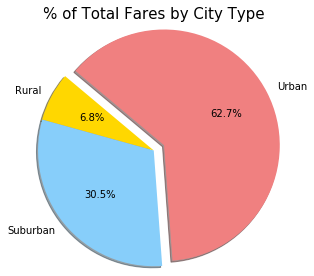

In [11]:
#*******************************************************************************
# Define data for the pie chart
#*******************************************************************************
types = ["Rural", "Suburban", "Urban" ]
sum_of_fares = total_fare_by_city_type

#*******************************************************************************
# Define appearance for the pie chart
#*******************************************************************************
colors = ["gold","lightskyblue", "lightcoral"]
explode = (0,0,0.15)

#*******************************************************************************
# Define the title for the pie chart
#*******************************************************************************
plt.title("% of Total Fares by City Type", y=1.15, fontsize=15)

#*******************************************************************************
# Define pie chart
#*******************************************************************************
plt.pie(sum_of_fares, explode=explode, labels=types, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140, radius=1.5)

#*******************************************************************************
# Show Figure
#*******************************************************************************
plt.tight_layout()
plt.show()

## Total Rides by City Type

In [12]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [13]:
# Create pie chart of "% of Total Rides by City Type"

In [14]:
#*******************************************************************************
# Get Ride Counts for each City Type
#*******************************************************************************
total_rides_by_city_type = merge_table.groupby(["type"]).count()["ride_id"]
total_rides_by_city_type


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

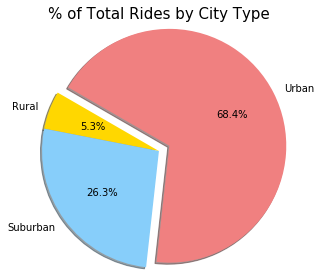

In [15]:
#*******************************************************************************
# Define data for the pie chart
#*******************************************************************************
types = ["Rural", "Suburban", "Urban" ]
num_rides = total_rides_by_city_type

#*******************************************************************************
# Define appearance for the pie chart
#*******************************************************************************
colors = ["gold","lightskyblue", "lightcoral"]
explode = (0,0,0.15)

#*******************************************************************************
# Define the title for the pie chart
#*******************************************************************************
plt.title("% of Total Rides by City Type", y=1.15,fontsize=15)

#*******************************************************************************
# Define pie chart
#*******************************************************************************
plt.pie(num_rides, explode=explode, labels=types, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=150, radius=1.5)

#*******************************************************************************
# Show Figure
#*******************************************************************************
plt.tight_layout()
plt.show()

## Total Drivers by City Type

In [16]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [17]:
#*******************************************************************************
# Create pie chart of "% of Total Drivers by City Type"
#*******************************************************************************

In [18]:
#*******************************************************************************
# Get a unique list of cities to eliminate summing duplicate values
#*******************************************************************************
unique_city_data = merge_table.drop_duplicates(subset="city")

#*******************************************************************************
# Get Total Drivers for each City Type
#*******************************************************************************
total_drivers_by_city_type = unique_city_data.groupby(["type"]).sum()["driver_count"]
total_drivers_by_city_type


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

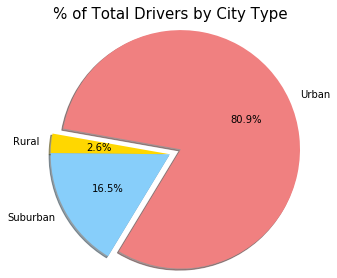

In [19]:
#*******************************************************************************
# Define data for the pie chart
#*******************************************************************************
types = ["Rural", "Suburban", "Urban" ]
num_drivers = total_drivers_by_city_type

#*******************************************************************************
# Define appearance for the pie chart
#*******************************************************************************
colors = ["gold","lightskyblue", "lightcoral"]
explode = (0,0,0.15)

#*******************************************************************************
# Define the title for the pie chart
#*******************************************************************************
plt.title("% of Total Drivers by City Type", y=1.15, fontsize=15)

#*******************************************************************************
# Define pie chart
#*******************************************************************************
plt.pie(num_drivers, explode=explode, labels=types, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=170, radius=1.5)

#*******************************************************************************
# Show Figure
#*******************************************************************************
plt.tight_layout()
plt.show()